<a href="https://colab.research.google.com/github/danunter/hw1_sqr_tracking/blob/main/sqr_detect_task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the sqr video

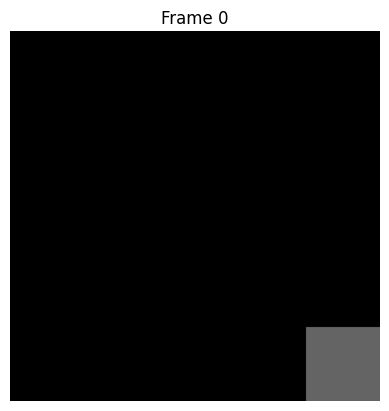

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation

# Function to update the position of the square
def update_position():
    global start_row, start_col, end_row, end_col, matrix_size
    if (end_row<matrix_size and end_col<matrix_size): #stop the sqr movmnt if touch frame
      start_row += 1
      end_row += 1
      start_col += 1
      end_col += 1
# Create a matrix of black cells (all zeros)
matrix_size = 250
matrix = np.zeros((matrix_size, matrix_size, 3), dtype=np.uint8)

# Initial position of the square
start_row = 0
start_col = 0
square_size = 50
end_row = start_row + square_size
end_col = start_col + square_size

# Set up the figure and axis
fig, ax = plt.subplots()

# Function to update the plot for each frame
def update(frame):
    global start_row, start_col, end_row, end_col

    # Clear the previous frame
    plt.clf()

    # Create a copy of the matrix with the updated square position
    frame_matrix = np.copy(matrix)
    frame_matrix[start_row:end_row, start_col:end_col, :] = 100 #colerNum

    # Plot the updated matrix
    plt.imshow(frame_matrix)
    plt.axis('off')
    plt.title(f'Frame {frame}')

    # Update the position of the square
    update_position()

# Create the animation
frame_number=matrix_size-square_size
ani = animation.FuncAnimation(fig, update, frames=frame_number, interval=50, repeat=False)

# Save the animation as an MP4 file
ani.save('animation.mp4', writer='ffmpeg', fps=30)

from IPython.display import HTML
from base64 import b64encode

# Define the file path
mp4_file_path = 'animation.mp4'

# Encode the video file
video_encoded = b64encode(open(mp4_file_path, 'rb').read()).decode('ascii')

# Display the video in the notebook
video_tag = f'<video controls alt="animation" src="data:video/mp4;base64,{video_encoded}">'
HTML(video_tag)



the tracking code

In [ ]:
# !pip install opencv-python-headless
import cv2
import numpy as np
from google.colab import files

# Load the video
video_path = 'animation.mp4'
cap = cv2.VideoCapture(video_path)


# Get the video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter to save the output video
output_video_name = 'output_animation.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_name, fourcc, fps, (width, height))

# Create BackgroundSubtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Ignore small contours
        if cv2.contourArea(contour) < 500:
            continue

        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate center coordinates
        cx, cy = x + w // 2, y + h // 2

        # Draw a red rectangle around the detected square
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 7)

        # Display center coordinates on the frame
        cv2.putText(frame, f'Center: ({cx}, {cy})', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    # Write the frame with the red rectangle to the output video
    out.write(frame)

# Release video capture and writer
cap.release()
out.release()


##################################################################################################################



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a matrix of black cells (all zeros)
matrix_size = 250
matrix = np.zeros((matrix_size, matrix_size, 3), dtype=np.uint8)

# Define the coordinates for the white square in the middle
square_size = 50
start_row = (matrix_size - square_size) // 2
start_col = (matrix_size - square_size) // 2
end_row = start_row + square_size
end_col = start_col + square_size

# Set the pixels in the white square to white (255)
matrix[start_row:end_row, start_col:end_col, :] = 255

# Extract the middle row
middle_row = matrix[matrix_size // 2, :, :]

# Plot the middle row
plt.plot(middle_row)
plt.title('Middle Row of the Matrix')
plt.xlabel('Column Index')
plt.ylabel('Pixel Value')
plt.show()